# Initial Setup

In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.2-py2.py3-none-any.whl size=317812365 sha256=816483b3e118c31cb0b6f85f506d629d832e0d86fb8b19b9b07dfeb69c2ddd1a
  Stored in directory: /root/.cache/pip/wheels/34/34/bd/03944534c44b677cd5859f248090daa9fb27b3c8f8e5f49574
Successfully built pyspark


In [2]:
!python -m pip install findspark

## Import Package

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
from pyspark.sql.window import Window
import pyspark.sql.functions as F

conf = SparkConf().setAppName('dibimbing').setMaster('local[*]')
sc = SparkContext.getOrCreate(conf=conf)
spark = SparkSession.builder.getOrCreate()

#Data Load and EDA

In [5]:
df = spark.read.csv('/content/BankChurners.csv', inferSchema=True, header=True)
df.show(5)

+---------+-----------------+------------+------+---------------+---------------+--------------+---------------+-------------+--------------+------------------------+----------------------+---------------------+------------+-------------------+---------------+--------------------+---------------+--------------+-------------------+---------------------+----------------------------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------+
|CLIENTNUM|   Attrition_Flag|Customer_Age|Gender|Dependent_count|Education_Level|Marital_Status|Income_Category|Card_Category|Months_on_book|Total_Relationship_Count|Months_Inactive_12_mon|Contacts_Count_12_mon|Credit_Limit|Total_Revolving_Bal|Avg_Open_To_Buy|Total_Amt_Chng_Q4_Q1|Total_Trans_Amt|Total_Trans_Ct|Total_Ct_Chng_Q4_Q1|Avg_Utilization_Ratio|Naive_Bayes_Classifier_Attrit

In [7]:
df.columns

['CLIENTNUM',
 'Attrition_Flag',
 'Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

In [8]:
df.printSchema()

root
 |-- CLIENTNUM: integer (nullable = true)
 |-- Attrition_Flag: string (nullable = true)
 |-- Customer_Age: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Dependent_count: integer (nullable = true)
 |-- Education_Level: string (nullable = true)
 |-- Marital_Status: string (nullable = true)
 |-- Income_Category: string (nullable = true)
 |-- Card_Category: string (nullable = true)
 |-- Months_on_book: integer (nullable = true)
 |-- Total_Relationship_Count: integer (nullable = true)
 |-- Months_Inactive_12_mon: integer (nullable = true)
 |-- Contacts_Count_12_mon: integer (nullable = true)
 |-- Credit_Limit: double (nullable = true)
 |-- Total_Revolving_Bal: integer (nullable = true)
 |-- Avg_Open_To_Buy: double (nullable = true)
 |-- Total_Amt_Chng_Q4_Q1: double (nullable = true)
 |-- Total_Trans_Amt: integer (nullable = true)
 |-- Total_Trans_Ct: integer (nullable = true)
 |-- Total_Ct_Chng_Q4_Q1: double (nullable = true)
 |-- Avg_Utilization_Ratio: double (n

## Simple Aggregation

In [9]:
df.describe('Attrition_Flag').show(10)

+-------+-----------------+
|summary|   Attrition_Flag|
+-------+-----------------+
|  count|            10127|
|   mean|             NULL|
| stddev|             NULL|
|    min|Attrited Customer|
|    max|Existing Customer|
+-------+-----------------+



In [10]:
df.select('Attrition_Flag','Customer_Age').show(10)

+-----------------+------------+
|   Attrition_Flag|Customer_Age|
+-----------------+------------+
|Existing Customer|          45|
|Existing Customer|          49|
|Existing Customer|          51|
|Existing Customer|          40|
|Existing Customer|          40|
|Existing Customer|          44|
|Existing Customer|          51|
|Existing Customer|          32|
|Existing Customer|          37|
|Existing Customer|          48|
+-----------------+------------+
only showing top 10 rows



In [16]:
df_grouped = df.groupBy("Customer_Age").agg(F.mean("Total_Revolving_Bal").alias("avg_revolving_bal"))

df_grouped.orderBy(F.col("avg_revolving_bal").desc()).show()

+------------+------------------+
|Customer_Age| avg_revolving_bal|
+------------+------------------+
|          67|           1969.25|
|          70|            1495.0|
|          66|            1392.0|
|          34|1295.7808219178082|
|          36|1294.7466063348415|
|          60|1283.5275590551182|
|          68|            1276.0|
|          58|1267.4012738853503|
|          65|1251.3168316831684|
|          57| 1251.134529147982|
|          53|1227.6511627906978|
|          63|1225.2769230769231|
|          55|1215.8673835125448|
|          61|1209.9569892473119|
|          52| 1204.877659574468|
|          32|1201.2264150943397|
|          39|1194.8318318318318|
|          54|1190.6091205211726|
|          45|1190.2633744855966|
|          27|           1175.75|
+------------+------------------+
only showing top 20 rows



In [12]:
df.groupby('Customer_Age').count().show()

+------------+-----+
|Customer_Age|count|
+------------+-----+
|          31|   91|
|          65|  101|
|          53|  387|
|          34|  146|
|          28|   29|
|          26|   78|
|          27|   32|
|          44|  500|
|          47|  479|
|          52|  376|
|          40|  361|
|          57|  223|
|          54|  307|
|          48|  472|
|          64|   43|
|          41|  379|
|          43|  473|
|          37|  260|
|          61|   93|
|          35|  184|
+------------+-----+
only showing top 20 rows



## Complex Aggregation

In [15]:
windowSpec = Window.partitionBy("Gender").orderBy(F.col("Total_Trans_Amt").desc())
df.withColumn("Rank", F.dense_rank().over(windowSpec)).show()

+---------+-----------------+------------+------+---------------+---------------+--------------+---------------+-------------+--------------+------------------------+----------------------+---------------------+------------+-------------------+---------------+--------------------+---------------+--------------+-------------------+---------------------+----------------------------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------+----+
|CLIENTNUM|   Attrition_Flag|Customer_Age|Gender|Dependent_count|Education_Level|Marital_Status|Income_Category|Card_Category|Months_on_book|Total_Relationship_Count|Months_Inactive_12_mon|Contacts_Count_12_mon|Credit_Limit|Total_Revolving_Bal|Avg_Open_To_Buy|Total_Amt_Chng_Q4_Q1|Total_Trans_Amt|Total_Trans_Ct|Total_Ct_Chng_Q4_Q1|Avg_Utilization_Ratio|Naive_Bayes_Classifier_A

## Complex Statistics


In [21]:
from pyspark.mllib.stat import Statistics

df_features = df.select("Customer_Age","Total_Trans_Amt","Total_Trans_Ct","Total_Revolving_Bal","Credit_Limit")


rdd_table = df_features.rdd.map(lambda row: row[0:])


corr_mat=Statistics.corr(rdd_table, method="pearson")
corr_mat

array([[ 1.        , -0.04644649, -0.06709686,  0.01477989,  0.00247623],
       [-0.04644649,  1.        ,  0.80719203,  0.06437048,  0.17173015],
       [-0.06709686,  0.80719203,  1.        ,  0.05606049,  0.07592691],
       [ 0.01477989,  0.06437048,  0.05606049,  1.        ,  0.04249261],
       [ 0.00247623,  0.17173015,  0.07592691,  0.04249261,  1.        ]])

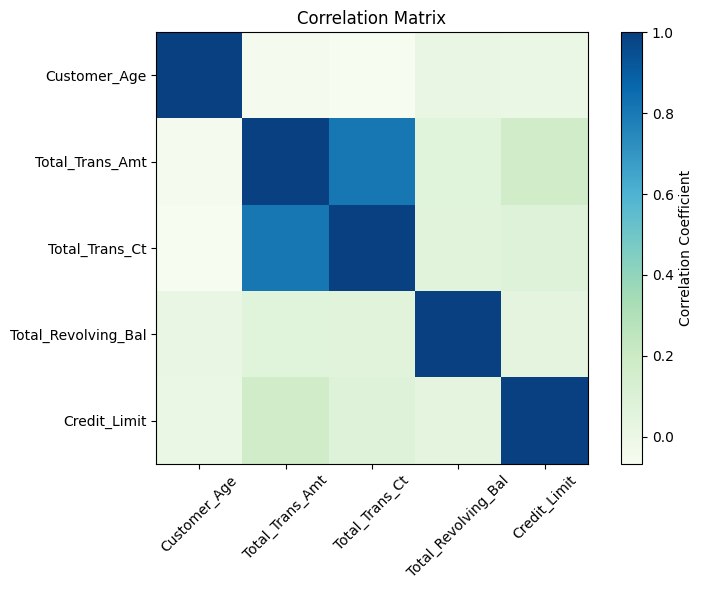

In [23]:
# Convert the correlation matrix to a numpy array for plotting
corr_mat = np.array(corr_mat)

# Visualization enhancement using Matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(corr_mat, cmap='GnBu', interpolation='none')
plt.colorbar(label="Correlation Coefficient")

# Set x and y labels with the respective column names
labels = ["Customer_Age", "Total_Trans_Amt", "Total_Trans_Ct", "Total_Revolving_Bal","Credit_Limit"]
plt.xticks(range(len(labels)), labels, rotation=45)
plt.yticks(range(len(labels)), labels)

# Add title and adjust the layout
plt.title("Correlation Matrix")
plt.tight_layout()

# Show the plot
plt.show()

In [20]:
def calculate_correlation(df, col1, col2):
    return df.select(F.corr(col1, col2).alias(f"corr_{col1}_{col2}"))

correlation = calculate_correlation(df, "Total_Trans_Amt", "Credit_Limit")
correlation.show()

+---------------------------------+
|corr_Total_Trans_Amt_Credit_Limit|
+---------------------------------+
|               0.1717301504679408|
+---------------------------------+



In [24]:
churned_customers = df.filter(F.col('Attrition_Flag') == 'Attrited Customer')
churned_customers_agg = churned_customers.groupBy("Gender").agg(F.avg("Total_Trans_Amt").alias("avg_trans"))
churned_customers_agg.show()

+------+------------------+
|Gender|         avg_trans|
+------+------------------+
|     F|2784.1838709677418|
|     M|3509.7790530846487|
+------+------------------+



## RDD and SQL

In [25]:
rdd = df.rdd.map(lambda row: (row['Customer_Age'], row['Total_Trans_Amt']))
age_trans_df = rdd.toDF(["Customer_Age", "Total_Trans_Amt"])
age_trans_df.show()

+------------+---------------+
|Customer_Age|Total_Trans_Amt|
+------------+---------------+
|          45|           1144|
|          49|           1291|
|          51|           1887|
|          40|           1171|
|          40|            816|
|          44|           1088|
|          51|           1330|
|          32|           1538|
|          37|           1350|
|          48|           1441|
|          42|           1201|
|          65|           1314|
|          56|           1539|
|          35|           1311|
|          57|           1570|
|          44|           1348|
|          48|           1671|
|          41|           1028|
|          61|           1336|
|          45|           1207|
+------------+---------------+
only showing top 20 rows



In [26]:
df.createOrReplaceTempView("bank_churners")
spark.sql("SELECT AVG(Credit_Limit) FROM bank_churners WHERE Attrition_Flag = 'Attrited Customer'").show()


+-----------------+
|avg(Credit_Limit)|
+-----------------+
| 8136.03945912722|
+-----------------+



#Data Vizualisation


##Scatter Plot


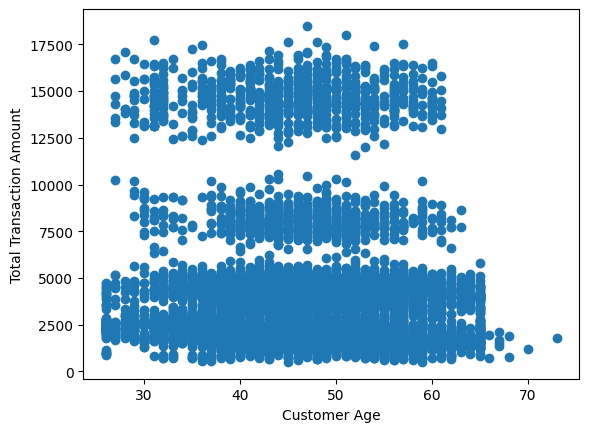

In [27]:
import matplotlib.pyplot as plt

age_trans_df_pd = age_trans_df.toPandas()
plt.scatter(age_trans_df_pd["Customer_Age"], age_trans_df_pd["Total_Trans_Amt"])
plt.xlabel("Customer Age")
plt.ylabel("Total Transaction Amount")
plt.show()

##Histogram of Age distribution

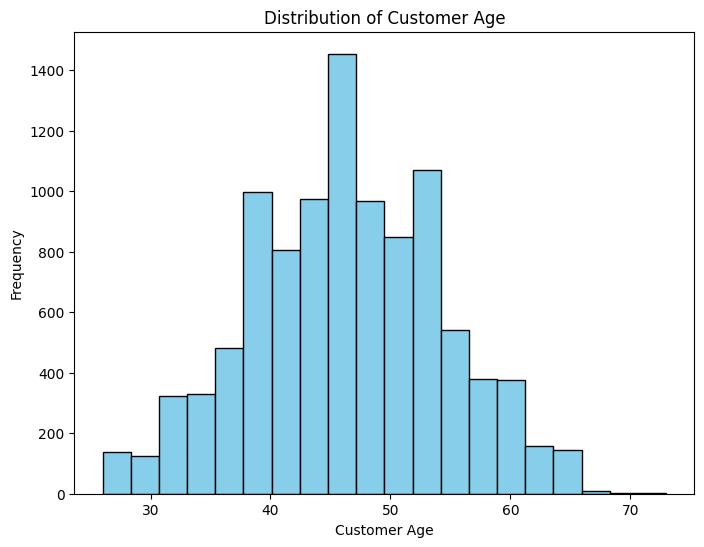

In [28]:
age_trans_df_pd = age_trans_df.toPandas()
plt.figure(figsize=(8, 6))
plt.hist(age_trans_df_pd['Customer_Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.show()

##Avg Transaction by Gender

<ipython-input-29-35ff14702d83>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='avg_trans_amt', data=df_gender_pd, palette='pastel')


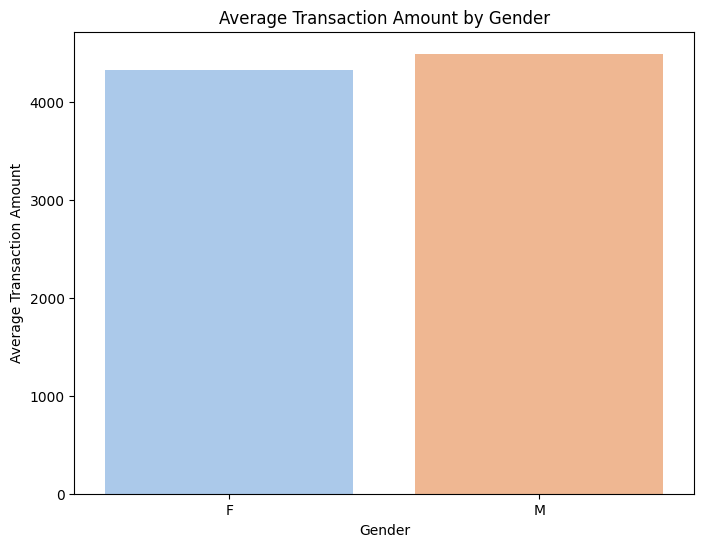

In [29]:
df_gender = df.groupBy("Gender").agg(F.avg("Total_Trans_Amt").alias("avg_trans_amt"))
df_gender_pd = df_gender.toPandas()

# Bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='avg_trans_amt', data=df_gender_pd, palette='pastel')
plt.title('Average Transaction Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Transaction Amount')
plt.show()

## Boxplot by Attrition status

<ipython-input-30-aad83076ccb0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition_Flag', y='Total_Revolving_Bal', data=df_boxplot, palette="Set3")


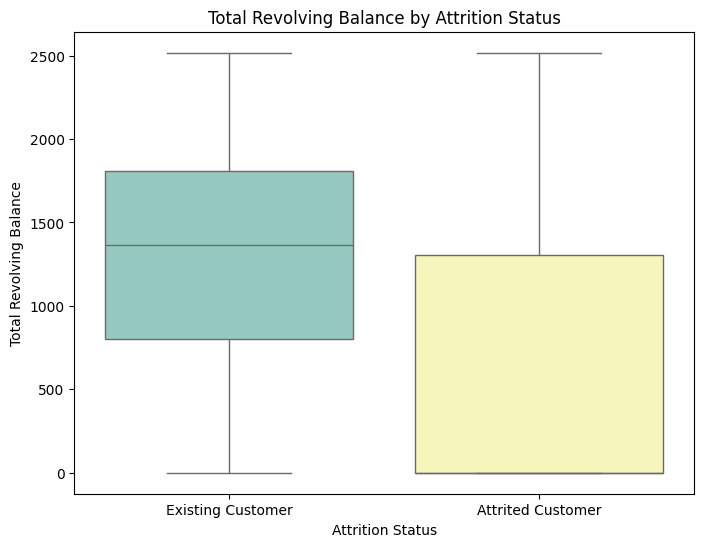

In [30]:
df_boxplot = df.select("Attrition_Flag", "Total_Revolving_Bal").toPandas()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Attrition_Flag', y='Total_Revolving_Bal', data=df_boxplot, palette="Set3")
plt.title('Total Revolving Balance by Attrition Status')
plt.xlabel('Attrition Status')
plt.ylabel('Total Revolving Balance')
plt.show()

## Correlation Heatmap

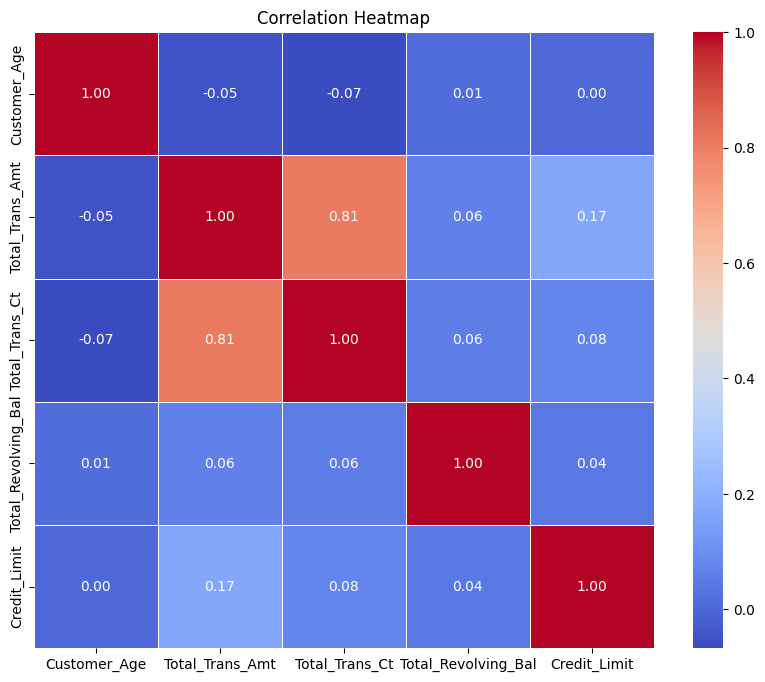

In [31]:
df_corr_pd = df_features.toPandas()
corr = df_corr_pd.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Pairplot

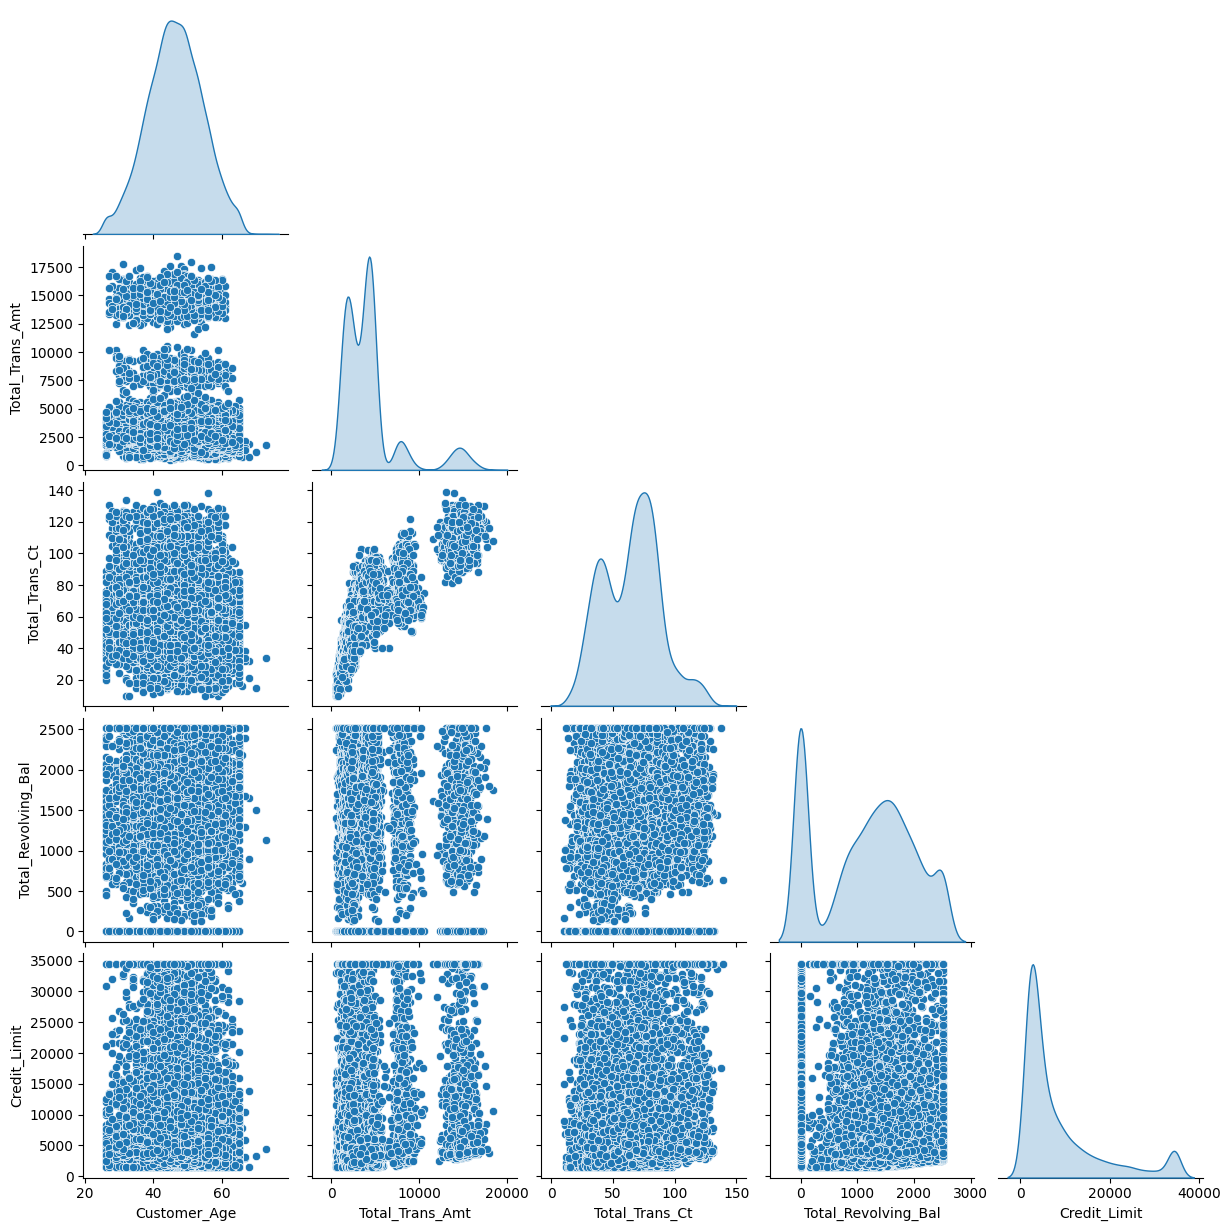

In [32]:
df_pairplot = df_features.toPandas()

sns.pairplot(df_pairplot, diag_kind='kde', corner=True)
plt.show()

##Others


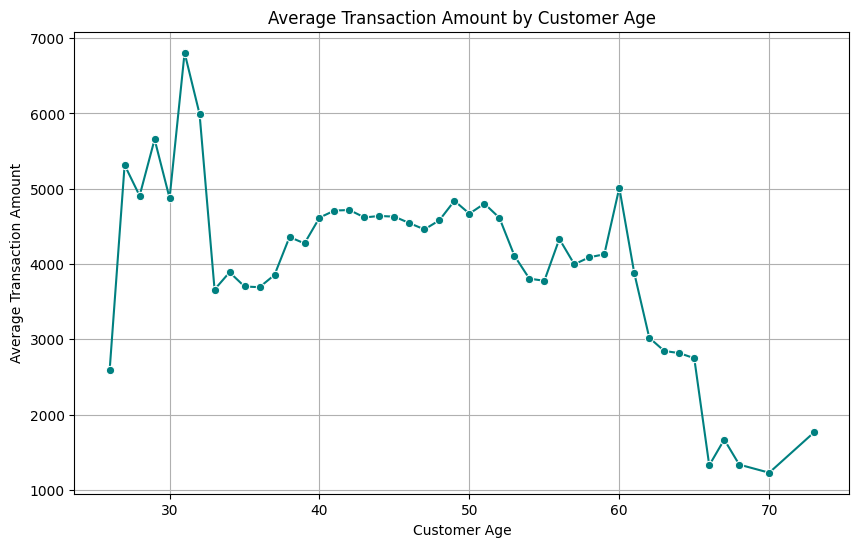

In [33]:
df_age_trans = df.groupBy("Customer_Age").agg(F.avg("Total_Trans_Amt").alias("avg_trans_amt"))
df_age_trans_pd = df_age_trans.toPandas()

# Line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x="Customer_Age", y="avg_trans_amt", data=df_age_trans_pd, marker="o", color="teal")
plt.title('Average Transaction Amount by Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Average Transaction Amount')
plt.grid(True)
plt.show()

<ipython-input-34-672283f10e22>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Card_Category', y='total_trans_amt', data=df_card_pd, palette='Blues_d')


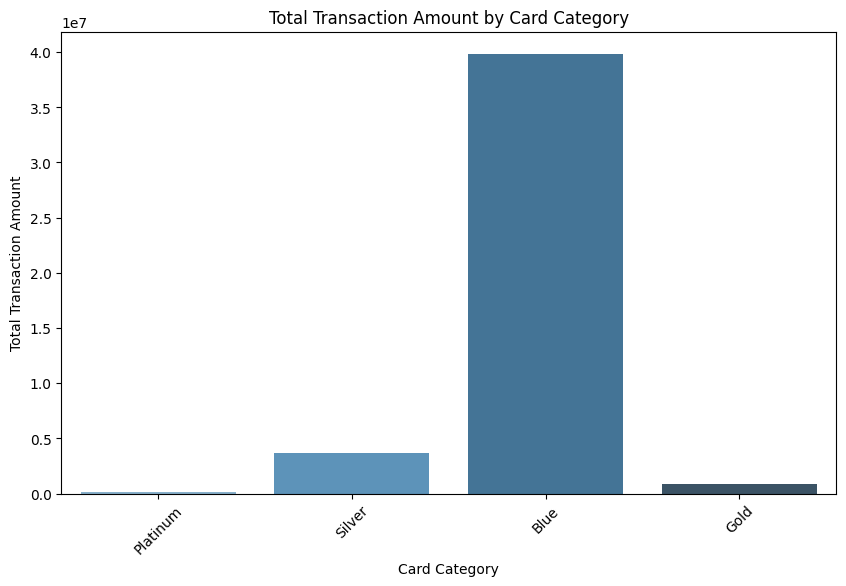

In [34]:
df_card = df.groupBy("Card_Category").agg(F.sum("Total_Trans_Amt").alias("total_trans_amt"))
df_card_pd = df_card.toPandas()

# Bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Card_Category', y='total_trans_amt', data=df_card_pd, palette='Blues_d')
plt.title('Total Transaction Amount by Card Category')
plt.xlabel('Card Category')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=45)
plt.show()

<ipython-input-35-2aa086136adb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Attrition_Flag', y='Total_Trans_Ct', data=df_violin, palette="Set2")


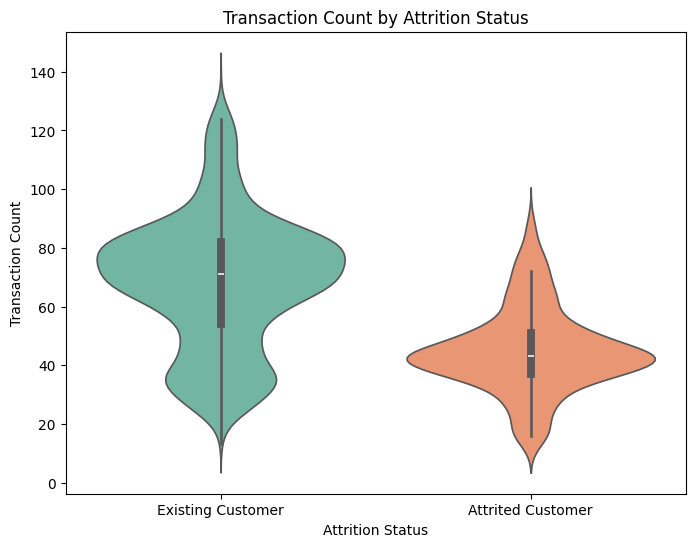

In [35]:
df_violin = df.select("Attrition_Flag", "Total_Trans_Ct").toPandas()

plt.figure(figsize=(8, 6))
sns.violinplot(x='Attrition_Flag', y='Total_Trans_Ct', data=df_violin, palette="Set2")
plt.title('Transaction Count by Attrition Status')
plt.xlabel('Attrition Status')
plt.ylabel('Transaction Count')
plt.show()